## Importing Required Modules

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras_preprocessing import sequence
from keras.utils import to_categorical
from keras.models import load_model

## Read Data and Pre Processing

In [2]:
#Reading the dataset
df = pd.read_csv(r'spam.csv',delimiter=',',encoding = 'latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#Dropping Unnecessary Columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.groupby(['v1']).size()

v1
ham     4825
spam     747
dtype: int64

In [5]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [6]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

## Training and Testing Data Split

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [8]:
max_words = 1000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)

sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [9]:
sequences_matrix

array([[  0,   0,   0, ...,  36,  25, 191],
       [  0,   0,   0, ...,  16,  10, 348],
       [  0,   0,   0, ...,  89, 278, 551],
       ...,
       [  0,   0,   0, ..., 476,   2,   4],
       [  0,   0,   0, ..., 628, 352, 204],
       [  0,   0,   0, ..., 556,   2,   7]])

## Creating LSTM model

In [10]:
inputs = Input(name='InputLayer',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256,name='FullyConnectedLayer1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1,name='OutputLayer')(layer)
layer = Activation('sigmoid')(layer)

## Compile The Model

In [11]:
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FullyConnectedLayer1 (Dense  (None, 256)              16640     
 )                                                               
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

## Fit The Model

In [12]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 5s 126ms/step - loss: 0.3112 - accuracy: 0.8904 - val_loss: 0.1320 - val_accuracy: 0.9705
Epoch 2/10
30/30 [==============================] - 3s 113ms/step - loss: 0.0777 - accuracy: 0.9834 - val_loss: 0.0662 - val_accuracy: 0.9800
Epoch 3/10
30/30 [==============================] - 3s 107ms/step - loss: 0.0573 - accuracy: 0.9844 - val_loss: 0.0733 - val_accuracy: 0.9821
Epoch 4/10
30/30 [==============================] - 3s 108ms/step - loss: 0.0354 - accuracy: 0.9897 - val_loss: 0.0704 - val_accuracy: 0.9821
Epoch 5/10
30/30 [==============================] - 3s 107ms/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.0694 - val_accuracy: 0.9873
Epoch 6/10
30/30 [==============================] - 3s 108ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0772 - val_accuracy: 0.9842
Epoch 7/10
30/30 [==============================] - 3s 112ms/step - loss: 0.0159 - accuracy: 0.9958 - val_loss: 0.0734 - val_accuracy: 0.9863
Epoch 

## Save The Model

In [13]:
model.save('spam_model')

INFO:tensorflow:Assets written to: spam_model\assets


INFO:tensorflow:Assets written to: spam_model\assets


## Test The Model

In [25]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix  = sequence.pad_sequences(test_sequences,maxlen=max_len)
accuracy = model.evaluate(test_sequences_matrix,Y_test)
print('Accuracy: {:0.3f}'.format(accuracy[1]))

27/27 [==============================] - 0s 11ms/step - loss: 0.0651 - accuracy: 0.9833
Accuracy: 0.983


In [26]:
y_pred = model.predict(test_sequences_matrix)
pred = y_pred[25:40].round(3)
test =Y_test[25:40]

27/27 [==============================] - 0s 11ms/step


In [27]:
print(pred)
print(test)

[[0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.001]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [1.   ]
 [1.   ]
 [0.   ]
 [0.   ]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]


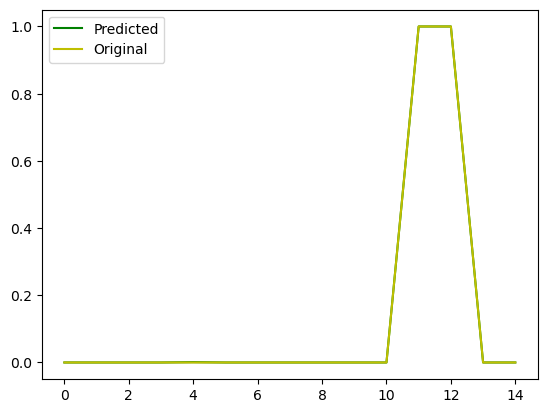

In [34]:
plt.plot(pred[:],color='g', label='Predicted')
plt.plot(test[:],color='y', label='Original')
plt.legend()
plt.show()